# Diagnosis

In [1]:
from IPython.display import Image

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Consider Wiscon Breast Cancer dataset

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X = df.loc[:, 2:].values
Y = df.loc[:,1].values

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [8]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

We use LabelEncoder to represent the labels as integers, so Malignant is labelled as 1 and Begnign as 0.

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

We should scale our data in order to obtain better performance. Also lets compress the dimensions (30 here) to 2 dimensions using **Principal Component Analysis** which will be taught later and finally we create a pipeline to do all this repetative stuff for us in a single go.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [12]:
pipe_lr =Pipeline([('scl',StandardScaler()),
                   ('pca',PCA(n_components=2)),
                   ('clf',LogisticRegression(random_state=1))])

In [13]:
pipe_lr.fit(X_train,Y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=2, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
pipe_lr.score(X_test,Y_test)

0.94736842105263153

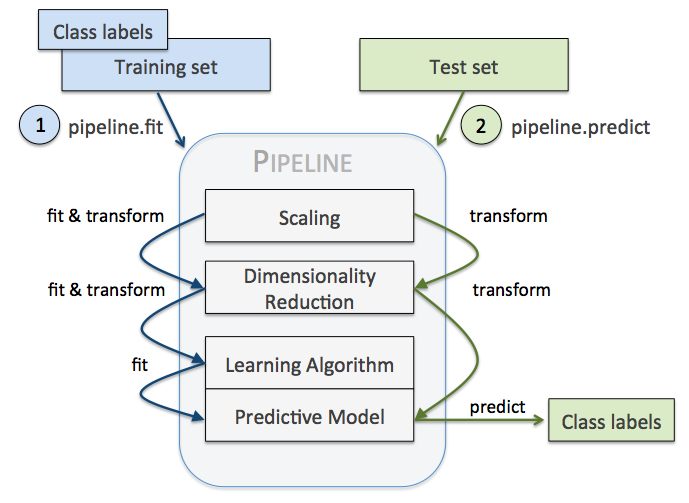

In [15]:
Image('cv-3.png')

## The k-fold cross validation approach

Consider a situation where our model is not suitably fit (under/over fit) we then penalize it to have minimal cost(error) on the test set, it means that we are even using the same test set as training implicitly, therefore if we develop new features by examining the test data set, then we may end up choosing features that work well specifically for test set, So $J_{test}(\theta)$ is no longer a good estimate of how well we generalize to new examples.

So it is always better to have training,cross-validation,testing sets.

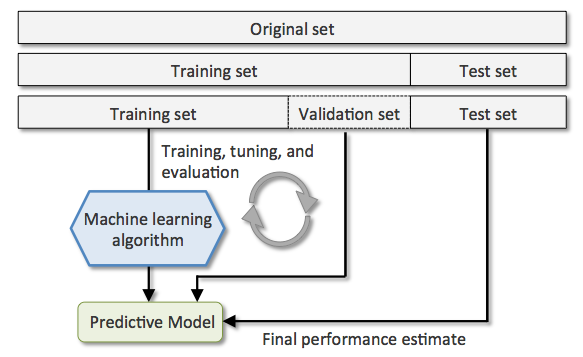

In [16]:
Image('cv.png')

In k-fold cross-validation, we randomly split the training dataset into k folds without replacement, where 1k- folds are used for the model training and one fold is used for testing. This procedure is repeated k times so that we obtain k models and performance estimates.

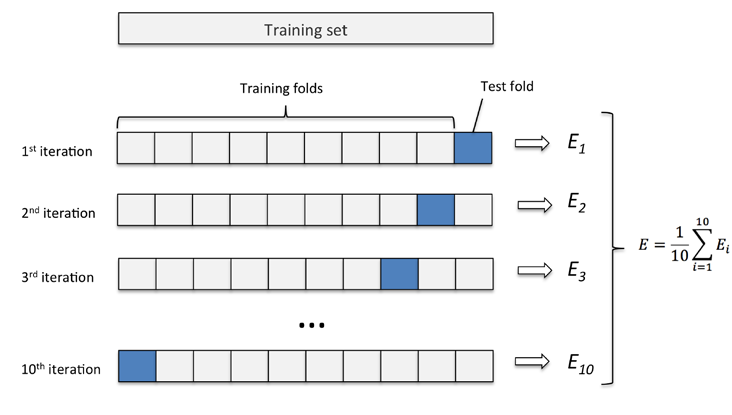

In [17]:
Image('cv-2.png')

We use **Stratified** k-fold cross validation which is an improvement to standard k-fold cross validation. In stratified cross-validation, the class proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset

In [18]:
from sklearn.cross_validation import StratifiedKFold

In [19]:
kfold = StratifiedKFold(Y_train,n_folds=10,random_state=1)

In [20]:
scores = []
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],Y_train[train])
    score = pipe_lr.score(X_train[test],Y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(Y_train[train]), score))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956


The most effective method than above is

In [21]:
from sklearn.cross_validation import cross_val_score

In [22]:
cross_val_score(pipe_lr,X_train,Y_train,cv=10)

array([ 0.89130435,  0.97826087,  0.97826087,  0.91304348,  0.93478261,
        0.97777778,  0.93333333,  0.95555556,  0.97777778,  0.95555556])

In [23]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029
